In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, RadioButtons
import warnings
import json


warnings.filterwarnings('ignore')

df = pd.read_csv("MBTA.csv")
df[["season", "year"]] = df["season"].str.extract(r'(\w+)\s+(\d{4})')
df["year"] = df["year"].astype(int)
df = df.drop(columns=['mode', "season", "route_name", "day_type_id", "time_period_id", "stop_id", 'ObjectId'])

time_order = ['VERY_EARLY_AM', 'EARLY_AM', 'AM_PEAK', 'MIDDAY_BASE', 
              'MIDDAY_SCHOOL', 'PM_PEAK', 'EVENING', 'LATE_EVENING', 'NIGHT']
red_line_stations = [
    "Alewife",
    "Davis",
    "Porter",
    "Harvard",
    "Central",
    "Kendall/MIT",
    "Charles/MGH",
    "Park Street",
    "Downtown Crossing",
    "South Station",
    "Broadway",
    "Andrew",
    "JFK/UMass",
    "Savin Hill",
    "Fields Corner",
    "Shawmut",
    "Ashmont",
    "North Quincy",
    "Wollaston",
    "Quincy Center",
    "Quincy Adams",
    "Braintree"
]
blue_line_stations = [
    "Bowdoin",
    "Government Center",
    "State",
    "Aquarium",
    "Maverick",
    "Airport",
    "Wood Island",
    "Orient Heights",
    "Suffolk Downs",
    "Beachmont",
    "Revere Beach",
    "Wonderland"
]
orange_line_stations = [
    "Oak Grove",
    "Malden Center",
    "Wellington",
    "Assembly",
    "Sullivan Square",
    "Community College",
    "North Station",
    "Haymarket",
    "Downtown Crossing",
    "Chinatown",
    "Tufts Medical Center",
    "Back Bay",
    "Massachusetts Avenue",
    "Ruggles",
    "Roxbury Crossing",
    "Jackson Square",
    "Stony Brook",
    "Green Street",
    "Forest Hills"
]

/Users/shefaliverma/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shefaliverma/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


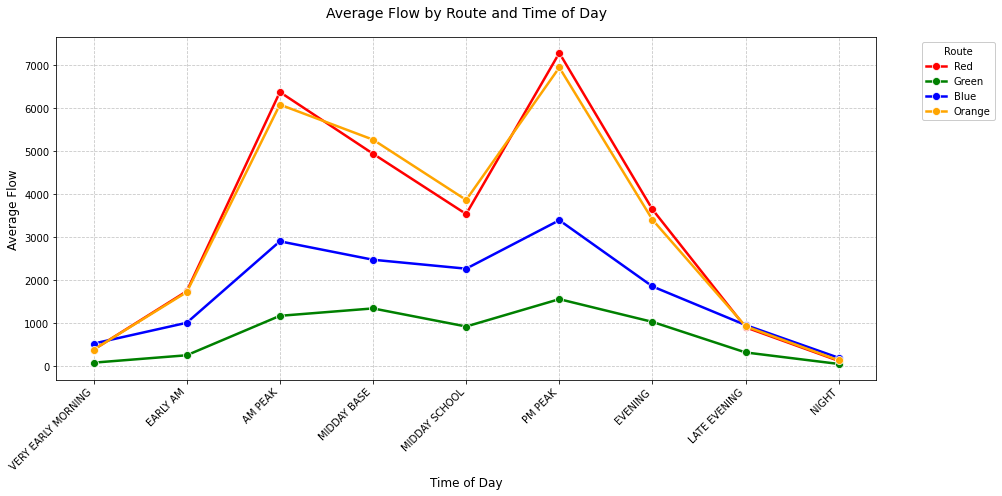

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_grouped = df.groupby(['time_period_name', 'route_id'])['average_flow'].mean().reset_index()
time_order = [
    'VERY_EARLY_MORNING', 
    'EARLY_AM', 
    'AM_PEAK', 
    'MIDDAY_BASE', 
    'MIDDAY_SCHOOL', 
    'PM_PEAK', 
    'EVENING', 
    'LATE_EVENING', 
    'NIGHT'
] 

df_grouped = df_grouped[df_grouped['time_period_name'] != 'OFF_PEAK']

df_grouped['time_period_name'] = pd.Categorical(
    df_grouped['time_period_name'], 
    categories=time_order, 
    ordered=True
)

df_grouped = df_grouped.sort_values('time_period_name')

route_colors = {
    'Red': 'red',
    'Green': 'green',
    'Blue': 'blue',
    'Orange': 'orange'
}

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_grouped, 
    x='time_period_name', 
    y='average_flow', 
    hue='route_id', 
    palette=route_colors, 
    marker='o',
    markersize=8,
    linewidth=2.5
)


plt.title('Average Flow by Route and Time of Day', fontsize=14, pad=20)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Flow', fontsize=12)
plt.xticks(rotation=45, ha='right')  


plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(
    title='Route', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',
    frameon=True,
    framealpha=1
)

plt.xticks(
    ticks=plt.xticks()[0], 
    labels=[label.get_text().replace('_', ' ') for label in plt.gca().get_xticklabels()], 
    rotation=45, 
    ha='right'
)
plt.tight_layout()
plt.show()

The line graph represents average flow across different times of day on the Boston T system, with time intervals ordered as VERY_EARLY_MORNING, EARLY_AM, AM_PEAK, MIDDAY_BASE, MIDDAY_SCHOOL, PM_PEAK, EVENING, LATE_EVENING, and NIGHT along the x-axis. The y-axis captures the average flow, showing clear peaks at AM_PEAK and PM_PEAK, indicative of commuter rush hours. The orange and red lines—likely representing the Orange Line and Red Line, two of the system’s busiest routes—experience the highest flow during these peak times. In contrast, the green and blue lines, possibly corresponding to the Green Line and Blue Line, exhibit comparatively lower usage. These trends align with known ridership patterns, where the Red and Orange Lines serve densely populated and commuter-heavy corridors. The midday and evening periods see a decline in flow, reflecting reduced travel demand outside of work and school commuting hours. Understanding these variations is essential for optimizing train frequency, reducing congestion, and enhancing service reliability, particularly during high-demand periods

In [3]:
import pandas as pd
import plotly.express as px
import panel as pn
pn.extension('plotly')

df = pd.read_csv("MBTA.csv")
df[["season", "year"]] = df["season"].str.extract(r'(\w+)\s+(\d{4})')
df["year"] = pd.to_numeric(df["year"], errors='coerce')
df = df.dropna(subset=['year'])
df = df.drop(columns=['mode', "season", "route_name", "day_type_id", "time_period_id", "stop_id", 'ObjectId'])

time_order = ['EARLY_AM', 'AM_PEAK', 'MIDDAY_BASE', 
              'MIDDAY_SCHOOL', 'PM_PEAK', 'EVENING', 'LATE_EVENING', 'NIGHT']

green_b_stops = ["Boston College", "South Street", "Chestnut Hill Ave.", "Chestnut Hill", "Sutherland Road",
                 "Washington Street", "Warren Street", "Allston Street", "Griggs Street", "Harvard Ave.", 
                 "Packards Corner", "Babcock Street", "Boston Univ. West", "Boston Univ. Central", "Boston Univ. East", 
                "Blandford Street", "Kenmore", "Hynes Convention Center", "Copley", "Arlington", "Boylston", "Park Street", 
                 "Government Center", "Haymarket", "North Station", "Science Park", "Lechmere"]

green_c_stops = ["Cleveland Circle","Englewood Ave.", "Dean Road", "Tappan Street", "Washington Square",
                 'Fairbanks Street', "Brandon Hall", "Summit Ave.", "Coolidge Corner", "Saint Paul Street",
                 "Kent Street", "Hawes Street", "Saint Mary Street","Kenmore", "Hynes Convention Center", "Copley", "Arlington", "Boylston", "Park Street", 
                 "Government Center", "Haymarket", "North Station", "Science Park", "Lechmere"]

green_d_stops = ["Riverside", "Woodland", "Waban", "Eliot", "Newton Highlands", "Newton Centre", "Chestnut Hill",
                "Reservoir", "Beaconsfield", "Brookline Hills", "Brookline Village", "Longwood", "Fenway","Kenmore", "Hynes Convention Center", "Copley", "Arlington", "Boylston", "Park Street", 
                 "Government Center", "Haymarket", "North Station", "Science Park", "Lechmere"]

green_e_stops = ["Heath Street", "Back of the Hill", "Riverway", "Mission Park", "Fenwood Road", "Brigham Circle",
                "Longwood Medical Area", "Museum of Fine Arts", "Northeastern University", 'Symphony', "Prudential",
                "Copley", "Arlington", "Boylston", "Park Street", "Government Center", "Haymarket", "North Station", 
                 "Science Park", "Lechmere"]

# Line definitions with stations in order
line_definitions = {
    "Red": {"stops": [
        "Alewife", "Davis", "Porter", "Harvard", "Central", "Kendall/MIT", "Charles/MGH", 
        "Park Street", "Downtown Crossing", "South Station", "Broadway", "Andrew", "JFK/UMass", 
        "Savin Hill", "Fields Corner", "Shawmut", "Ashmont", "North Quincy", "Wollaston", 
        "Quincy Center", "Quincy Adams", "Braintree"
    ], "color": "Reds"},
    
    "Blue": {"stops": [
        "Bowdoin", "Government Center", "State", "Aquarium", "Maverick", "Airport", 
        "Wood Island", "Orient Heights", "Suffolk Downs", "Beachmont", "Revere Beach", "Wonderland"
    ], "color": "Blues"},
    
    "Orange": {"stops": [
        "Oak Grove", "Malden Center", "Wellington", "Assembly", "Sullivan Square", 
        "Community College", "North Station", "Haymarket", "Downtown Crossing", "Chinatown", 
        "Tufts Medical Center", "Back Bay", "Massachusetts Avenue", "Ruggles", "Roxbury Crossing", 
        "Jackson Square", "Stony Brook", "Green Street", "Forest Hills"
    ], "color": "Oranges"},
    
    "Green B": {"stops": green_b_stops, "color": "Greens"},
    "Green C": {"stops": green_c_stops, "color": "Greens"},
    "Green D": {"stops": green_d_stops, "color": "Greens"},
    "Green E": {"stops": green_e_stops, "color": "Greens"},
}

line_selector = pn.widgets.RadioButtonGroup(
    name='Select MBTA Line:',
    options=["Red", "Blue", "Orange", "Green B", "Green C", "Green D", "Green E"],
    button_type='success',
    width=1000
)

def get_height(line):
    num_stations = len(line_definitions[line]["stops"])
    base_height = 600
    if line.startswith("Green"):
        return max(800, num_stations * 25) 
    return base_height

@pn.depends(line_selector.param.value)
def plot_heatmap(line):
    config = line_definitions[line]
    
   
    if line.startswith("Green"):
        route_df = df[df["stop_name"].isin(config["stops"])].copy()
    else:
        route_df = df[df["route_id"] == line.split()[0]].copy()
    
    avg_flow = route_df.groupby(['stop_name', 'time_period_name'])['average_flow'].mean().reset_index()
    pivot_df = avg_flow.pivot_table(
        values='average_flow',
        index='stop_name',
        columns='time_period_name',
        fill_value=0
    ).reindex(columns=time_order, index=config["stops"])
    
    fig = px.imshow(
        pivot_df,
        color_continuous_scale=config["color"].lower(),
    labels=dict(x="Time Period", y="Station", color="Average Flow"),  # Updated here
        title=f"MBTA {line} Line - Average Flow by Time Period"
    )
    
    height = get_height(line)
    fig.update_layout(
        width=1000,
        height=height,
        yaxis=dict(tickmode='linear'),
        margin=dict(l=150, r=50, b=100, t=100)
    )
    
    return fig

dashboard = pn.Column(
    line_selector,
    plot_heatmap,
    sizing_mode='stretch_width'
)

try:
    dashboard.save("mbta_avg_flow.html", embed=True)
except Exception as e:
    print(f"Error saving interactive HTML: {e}")
    for line in line_definitions:
        fig = plot_heatmap(line)
        fig.write_html(f"mbta_{line}_avg_flow_static.html")

This interactive visualization focuses on the MBTA (Massachusetts Bay Transportation Authority) subway system, providing an in-depth view of ridership trends across the Red, Blue, Orange, and Green lines throughout the day. By selecting a specific line, users can explore how average boarding patterns vary across different time periods, such as early mornings, peak commuting hours, and late evenings. The heatmap format highlights the flow of passengers at each station, offering valuable insights into station-specific demand at various times of day. This can help transit planners understand congestion points, optimize train schedules, and adjust service frequency based on real-time passenger flow. For commuters, this tool offers an opportunity to plan trips more efficiently, avoiding crowded stations during peak times. Overall, this visualization is a powerful resource for improving the MBTA’s operations and providing a more seamless, data-driven experience for both passengers and service providers.

In [4]:
import pandas as pd
import plotly.express as px
import panel as pn
pn.extension('plotly')

df = pd.read_csv("MBTA.csv")
df[["season", "year"]] = df["season"].str.extract(r'(\w+)\s+(\d{4})')
df["year"] = pd.to_numeric(df["year"], errors='coerce')
df = df.dropna(subset=['year'])
df = df.drop(columns=['mode', "season", "route_name", "day_type_id", "time_period_id", "stop_id", 'ObjectId'])

time_order = ['EARLY_AM', 'AM_PEAK', 'MIDDAY_BASE', 
              'MIDDAY_SCHOOL', 'PM_PEAK', 'EVENING', 'LATE_EVENING', 'NIGHT']

green_b_stops = ["Boston College", "South Street", "Chestnut Hill Ave.", "Chestnut Hill", "Sutherland Road",
                 "Washington Street", "Warren Street", "Allston Street", "Griggs Street", "Harvard Ave.", 
                 "Packards Corner", "Babcock Street", "Boston Univ. West", "Boston Univ. Central", "Boston Univ. East", 
                 "Blandford Street", "Kenmore", "Hynes Convention Center", "Copley", "Arlington", "Boylston", "Park Street", 
                 "Government Center", "Haymarket", "North Station", "Science Park", "Lechmere"]

green_c_stops = ["Cleveland Circle","Englewood Ave.", "Dean Road", "Tappan Street", "Washington Square",
                 'Fairbanks Street', "Brandon Hall", "Summit Ave.", "Coolidge Corner", "Saint Paul Street",
                 "Kent Street", "Hawes Street", "Saint Mary Street","Kenmore", "Hynes Convention Center", "Copley", "Arlington", "Boylston", "Park Street", 
                 "Government Center", "Haymarket", "North Station", "Science Park", "Lechmere"]

green_d_stops = ["Riverside", "Woodland", "Waban", "Eliot", "Newton Highlands", "Newton Centre", "Chestnut Hill",
                "Reservoir", "Beaconsfield", "Brookline Hills", "Brookline Village", "Longwood", "Fenway","Kenmore", "Hynes Convention Center", "Copley", "Arlington", "Boylston", "Park Street", 
                 "Government Center", "Haymarket", "North Station", "Science Park", "Lechmere"]

green_e_stops = ["Heath Street", "Back of the Hill", "Riverway", "Mission Park", "Fenwood Road", "Brigham Circle",
                "Longwood Medical Area", "Museum of Fine Arts", "Northeastern University", 'Symphony', "Prudential",
                "Copley", "Arlington", "Boylston", "Park Street", "Government Center", "Haymarket", "North Station", 
                 "Science Park", "Lechmere"]

line_definitions = {
    "Red": {"stops": [
        "Alewife", "Davis", "Porter", "Harvard", "Central", "Kendall/MIT", "Charles/MGH", 
        "Park Street", "Downtown Crossing", "South Station", "Broadway", "Andrew", "JFK/UMass", 
        "Savin Hill", "Fields Corner", "Shawmut", "Ashmont", "North Quincy", "Wollaston", 
        "Quincy Center", "Quincy Adams", "Braintree"
    ], "color": "Reds"},
    
    "Blue": {"stops": [
        "Bowdoin", "Government Center", "State", "Aquarium", "Maverick", "Airport", 
        "Wood Island", "Orient Heights", "Suffolk Downs", "Beachmont", "Revere Beach", "Wonderland"
    ], "color": "Blues"},
    
    "Orange": {"stops": [
        "Oak Grove", "Malden Center", "Wellington", "Assembly", "Sullivan Square", 
        "Community College", "North Station", "Haymarket", "Downtown Crossing", "Chinatown", 
        "Tufts Medical Center", "Back Bay", "Massachusetts Avenue", "Ruggles", "Roxbury Crossing", 
        "Jackson Square", "Stony Brook", "Green Street", "Forest Hills"
    ], "color": "Oranges"},
    
    "Green B": {"stops": green_b_stops, "color": "Greens"},
    "Green C": {"stops": green_c_stops, "color": "Greens"},
    "Green D": {"stops": green_d_stops, "color": "Greens"},
    "Green E": {"stops": green_e_stops, "color": "Greens"},
}

line_selector = pn.widgets.RadioButtonGroup(
    name='Select MBTA Line:',
    options=["Red", "Blue", "Orange", "Green B", "Green C", "Green D", "Green E"],
    button_type='success',
    width=1000
)

def get_height(line):
    num_stations = len(line_definitions[line]["stops"])
    return max(800, num_stations * 25)

@pn.depends(line_selector.param.value)
def plot_heatmap(line):
    config = line_definitions[line]
    
    if line.startswith("Green"):
        route_df = df[df["stop_name"].isin(config["stops"])].copy()
    else:
        route_df = df[df["route_id"] == line.split()[0]].copy()
    
    avg_flow = route_df.groupby(['stop_name', 'time_period_name'])['average_flow'].mean().reset_index()
    pivot_df = avg_flow.pivot_table(
        values='average_flow',
        index='stop_name',
        columns='time_period_name',
        fill_value=0
    ).reindex(columns=time_order, index=config["stops"])
    
    fig = px.imshow(
        pivot_df,
        color_continuous_scale=config["color"].lower(),
        labels=dict(x="Time Period", y="Station", color="Average Flow"),
        title=f"MBTA {line} Line - Average Flow by Time Period"
    )
    
    new_labels = [label.replace("_", " ").title() for label in pivot_df.columns]
    fig.update_xaxes(
        ticktext=new_labels,
        tickvals=list(pivot_df.columns)
    )

    num_time_periods = len(pivot_df.columns)
    num_stations = len(pivot_df.index)
    square_width = 150 
    square_height = 40  

    fig.update_layout(
        width=1000,
        height=num_stations * square_height,
        yaxis=dict(tickmode='linear'),
        margin=dict(l=150, r=50, b=100, t=100)
    )
    
    return fig

dashboard = pn.Column(
    line_selector,
    plot_heatmap,
    sizing_mode='stretch_width'
)

try:
    dashboard.save("mbta_avg_flow.html", embed=True)
except Exception as e:
    print(f"Error saving interactive HTML: {e}")
    for line in line_definitions:
        fig = plot_heatmap(line)
        fig.write_html(f"mbta_{line}_avg_flow_static.html")

dashboard.servable()


Column(sizing_mode='stretch_width')
    [0] RadioButtonGroup(button_type='success', name='Select MBTA Line:', options=['Red', 'Blue', ...], value='Red', width=1000)
    [1] ParamFunction(function)

In [5]:
df = pd.read_csv("MBTA.csv")

In [6]:
import pandas as pd

stops = pd.read_csv('stops.txt')
df_subway = df[df['route_id'].isin(['Red', 'Green', 'Orange', 'Blue'])]
df_merged = df_subway.merge(stops[['stop_id', 'stop_lat', 'stop_lon']], on='stop_id', how='left')

df_merged.rename(columns={'stop_lat': 'latitude', 'stop_lon': 'longitude'}, inplace=True)
df_merged

,mode,season,route_id,route_name,direction_id,day_type_id,day_type_name,time_period_id,time_period_name,stop_name,stop_id,total_ons,total_offs,number_service_days,average_ons,average_offs,average_flow,ObjectId,latitude,longitude
0,0,Fall 2019,Green,Green Line,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,Allston Street,place-alsgr,0,17,77,0,0,4,1,42.348701,-71.137955
1,0,Fall 2019,Green,Green Line,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,Arlington,place-armnl,2675,8021,77,35,104,381,2,42.351902,-71.070893
2,0,Fall 2019,Green,Green Line,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,Babcock Street,place-babck,0,151,77,0,2,8,3,42.351616,-71.119924
3,0,Fall 2019,Green,Green Line,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,Back of the Hill,place-bckhl,0,36,77,0,0,4,4,42.330139,-71.111313
4,0,Fall 2019,Green,Green Line,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,Beaconsfield,place-bcnfd,12,67,77,0,1,44,5,42.335765,-71.140455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,1,Fall 2017,Red,Red Line,0,day_type_02,saturday,time_period_10,OFF_PEAK,Porter,place-portr,59366,9940,16,3710,621,13842,7916,42.388400,-71.119149
7916,1,Fall 2017,Red,Red Line,0,day_type_02,saturday,time_period_10,OFF_PEAK,Quincy Adams,place-qamnl,388,26507,16,24,1657,1549,7917,42.233391,-71.007153
7917,1,Fall 2017,Red,Red Line,0,day_type_02,saturday,time_period_10,OFF_PEAK,Quincy Center,place-qnctr,2128,67000,16,133,4188,3182,7918,42.251809,-71.005409
7918,1,Fall 2017,Red,Red Line,0,day_type_02,saturday,time_period_10,OFF_PEAK,Savin Hill,place-shmnl,2292,18338,16,143,1146,7237,7919,42.311290,-71.053331


In [7]:
print(df_subway.columns)


Index(['mode', 'season', 'route_id', 'route_name', 'direction_id',
       'day_type_id', 'day_type_name', 'time_period_id', 'time_period_name',
       'stop_name', 'stop_id', 'total_ons', 'total_offs',
       'number_service_days', 'average_ons', 'average_offs', 'average_flow',
       'ObjectId'],
      dtype='object')


In [8]:
gtfs_df = pd.read_csv('stops.txt')

df = pd.merge(df, gtfs_df[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']], on='stop_name', how='left')
df.rename(columns={'stop_lat': 'latitude', 'stop_lon': 'longitude'}, inplace=True)
print(df[['stop_name', 'latitude', 'longitude']].head())

#df_merged = df_subway.merge(stops[['stop_id', 'stop_lat', 'stop_lon']], left_on='stop_id_x', right_on='stop_id', how='left')


#df_merged.drop(columns=['stop_id_x', 'stop_id_y'], inplace=True)

#df_merged.rename(columns={'stop_lat': 'latitude', 'stop_lon': 'longitude'}, inplace=True)
#print(df_merged.head())

#df_merged = df_subway.merge(stops[['stop_id', 'stop_lat', 'stop_lon']], on='stop_id', how='left')

# Rename columns for clarity
#df_merged.rename(columns={'stop_lat': 'latitude', 'stop_lon': 'longitude'}, inplace=True)

# Display the first few rows of the merged DataFrame
#print(df_merged.head())

        stop_name   latitude  longitude
0  Allston Street  42.348701 -71.137955
1  Allston Street  42.348649 -71.137881
2  Allston Street  42.348546 -71.137362
3       Arlington  42.351765 -71.070881
4       Arlington  42.351902 -71.070893


In [9]:
print(df.columns)


Index(['mode', 'season', 'route_id', 'route_name', 'direction_id',
       'day_type_id', 'day_type_name', 'time_period_id', 'time_period_name',
       'stop_name', 'stop_id_x', 'total_ons', 'total_offs',
       'number_service_days', 'average_ons', 'average_offs', 'average_flow',
       'ObjectId', 'stop_id_y', 'latitude', 'longitude'],
      dtype='object')


In [10]:
station_flow = df.groupby(['stop_name', 'stop_id_x', 'route_id', 'latitude', 'longitude'], as_index=False)['average_flow'].sum()

# Sort by average_flow in descending order and keep the first entry for each stop_name
station_flow = station_flow.sort_values('average_flow', ascending=False).drop_duplicates(subset='stop_name', keep='first')

# Display the results
print(station_flow.head())

             stop_name    stop_id_x route_id   latitude  longitude  \
777        Park Street  place-pktrm      Red  42.356395 -71.062424   
973      South Station  place-sstat      Red  42.352271 -71.055242   
295  Downtown Crossing  place-dwnxg      Red  42.355518 -71.060225   
437          Haymarket  place-haecl   Orange  42.363021 -71.058290   
375  Government Center  place-gover    Green  42.359705 -71.059215   

     average_flow  
777       4930839  
973       2860455  
295       2827380  
437       2176735  
375       1805790  


In [11]:
import folium

mbta_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

for _, row in station_flow.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5 + (row['average_flow'] / station_flow['average_flow'].max()) * 10,  # scale size
        color=row['route_id'],
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['stop_name']}<br>Flow: {row['average_flow']:.0f}"
    ).add_to(mbta_map)

mbta_map.save("mbta_flow_map.html")


In [12]:
import folium
import pandas as pd


m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

for index, row in station_flow.iterrows():
    stop_name = row['stop_name']
    line_color = row['route_id']
    latitude = row['latitude']
    longitude = row['longitude']
    flow = row['average_flow'] / 3  # Normalize the flow by dividing by 3 (for 3 years of data)
    
    size = flow / 100000  
    
   
    line_colors = line_color.split(', ') if isinstance(line_color, str) else [line_color]
    if len(line_colors) == 1:
        color = line_colors[0].lower()
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=size,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"{stop_name}: {flow:.2f} Total Flow"
        ).add_to(m)
    else:
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=size,
            color=line_colors[0].lower(),
            fill=True,
            fill_color=line_colors[0].lower(),
            fill_opacity=0.7,
            popup=f"{stop_name}: {flow:.2f} Total Flow"
        ).add_to(m)
        
        for line in line_colors[1:]:
            folium.CircleMarker(
                location=[latitude, longitude],
                radius=size * 0.6, 
                color=line.lower(),
                fill=True,
                fill_color=line.lower(),
                fill_opacity=0.5,
                popup=f"{stop_name}: {flow:.2f} Total Flow"
            ).add_to(m)

folium.LayerControl().add_to(m)

m.save("mbta_subway_stations_map_with_ids.html")


In [13]:
import folium
import pandas as pd
import json
import geopandas as gpd



with open('bostonwards.json') as f:
    wards_data = json.load(f)

m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)

max_flow = station_flow['average_flow'].max() / 50  
min_flow = station_flow['average_flow'].min() / 50 

folium.GeoJson(
    wards_data,
    name="Ward Boundaries",
    style_function=lambda feature: {
        'fillColor': '#00000000',  
        'color': 'black',          
        'weight': 2,
    },
    tooltip=folium.GeoJsonTooltip(fields=['WARD'], aliases=['Ward:'])
).add_to(m)

for index, row in station_flow.iterrows():
    stop_name = row['stop_name']
    line_color = row['route_id']
    latitude = row['latitude']
    longitude = row['longitude']
    flow = row['average_flow'] / 50  
    
    size = 5 + (flow - min_flow) / (max_flow - min_flow) * 15  
    
   
    line_colors = line_color.split(', ') if isinstance(line_color, str) else [line_color]
    
    if len(line_colors) == 1:
        color = line_colors[0].lower()
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=size,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"{stop_name}: {flow:.2f} Total Flow"
        ).add_to(m)
    else:
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=size,
            color=line_colors[0].lower(),
            fill=True,
            fill_color=line_colors[0].lower(),
            fill_opacity=0.7,
            popup=f"{stop_name}: {flow:.2f} Total Flow"
        ).add_to(m)
        
        for line in line_colors[1:]:
            folium.CircleMarker(
                location=[latitude, longitude],
                radius=size * 0.6, 
                color=line.lower(),
                fill=True,
                fill_color=line.lower(),
                fill_opacity=0.5,
                popup=f"{stop_name}: {flow:.2f} Total Flow"
            ).add_to(m)

m.save("mbta_subway_stations+.html")
m


In [14]:
wards_data = gpd.read_file("bostonwards.json")
m = folium.Map(location=[42.36, -71.06], zoom_start=12)

folium.GeoJson(wards_data, name="Ward Boundaries").add_to(m)
m

In [15]:
m